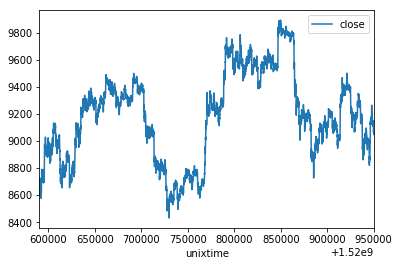

In [71]:
%matplotlib inline
from sac14.btcusd import btcusd

dataframe = btcusd()
dataframe.plot()

In [72]:
dataframe.head(3)

,close
unixtime,
1520590560,8604.5
1520590620,8627.5
1520590680,8645.0


In [73]:
dataset = dataframe.values.astype('float32')
dataset

array([[ 8604.5],
       [ 8627.5],
       [ 8645. ],
       ..., 
       [ 9044.5],
       [ 9068. ],
       [ 9080. ]], dtype=float32)

In [74]:
from sklearn.preprocessing import MinMaxScaler

# 終値を 0 ~ 1 の範囲に正規化する
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[ 0.11857414],
       [ 0.13433838],
       [ 0.14633322],
       ..., 
       [ 0.42015076],
       [ 0.43625784],
       [ 0.44448233]], dtype=float32)

In [75]:
# 訓練データとテストデータに分割する
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train_size, test_size

(4020, 1980)

In [76]:
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
train

array([[ 0.11857414],
       [ 0.13433838],
       [ 0.14633322],
       ..., 
       [ 0.7361207 ],
       [ 0.74091864],
       [ 0.74503088]], dtype=float32)

In [77]:
test

array([[ 0.75736809],
       [ 0.75359821],
       [ 0.75325584],
       ..., 
       [ 0.42015076],
       [ 0.43625784],
       [ 0.44448233]], dtype=float32)

In [78]:
import numpy as np

def create_dataset(dataset, look_back=1):
    data_x, data_y = [], []
    for i in range(len(dataset) - look_back - 1):
        data_x.append(dataset[i:(i + look_back), 0])
        data_y.append(dataset[i + look_back, 0])
    return np.array(data_x), np.array(data_y)

In [79]:
look_back = 3
train_x, train_y = create_dataset(train, look_back)
train_x

array([[ 0.11857414,  0.13433838,  0.14633322],
       [ 0.13433838,  0.14633322,  0.18163109],
       [ 0.14633322,  0.18163109,  0.20253611],
       ..., 
       [ 0.76010942,  0.73132277,  0.74160385],
       [ 0.73132277,  0.74160385,  0.73440695],
       [ 0.74160385,  0.73440695,  0.7361207 ]], dtype=float32)

In [80]:
train_y

array([ 0.18163109,  0.20253611,  0.18026018, ...,  0.73440695,
        0.7361207 ,  0.74091864], dtype=float32)

In [81]:
test_x, test_y = create_dataset(test, look_back)

In [82]:
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
train_x.shape

(4016, 3, 1)

In [83]:
train_x

array([[[ 0.11857414],
        [ 0.13433838],
        [ 0.14633322]],

       [[ 0.13433838],
        [ 0.14633322],
        [ 0.18163109]],

       [[ 0.14633322],
        [ 0.18163109],
        [ 0.20253611]],

       ..., 
       [[ 0.76010942],
        [ 0.73132277],
        [ 0.74160385]],

       [[ 0.73132277],
        [ 0.74160385],
        [ 0.73440695]],

       [[ 0.74160385],
        [ 0.73440695],
        [ 0.7361207 ]]], dtype=float32)

In [84]:
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))
test_x.shape

(1976, 3, 1)

In [85]:
# モデル構築 SimpleRNN

from keras.models import Sequential
from keras.layers import Dense, Activation, SimpleRNN

In [86]:
hid_dim = 10
model = Sequential()
# input_shape = (系列長T, x_tの次元)
# output_shape = (系列長T, units(=hid_dim))
model.add(SimpleRNN(hid_dim, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [87]:
model.fit(train_x, train_y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
 - 7s - loss: 6.8465e-04
Epoch 2/100
 - 6s - loss: 2.3080e-04
Epoch 3/100
 - 6s - loss: 2.1897e-04
Epoch 4/100
 - 5s - loss: 2.1310e-04
Epoch 5/100
 - 5s - loss: 2.0698e-04
Epoch 6/100
 - 6s - loss: 2.0553e-04
Epoch 7/100
 - 6s - loss: 2.0191e-04
Epoch 8/100
 - 5s - loss: 1.9932e-04
Epoch 9/100
 - 5s - loss: 2.0183e-04
Epoch 10/100
 - 5s - loss: 1.9441e-04
Epoch 11/100
 - 5s - loss: 1.9754e-04
Epoch 12/100
 - 5s - loss: 1.9785e-04
Epoch 13/100
 - 5s - loss: 1.9107e-04
Epoch 14/100
 - 5s - loss: 1.8867e-04
Epoch 15/100
 - 5s - loss: 1.9290e-04
Epoch 16/100
 - 5s - loss: 1.8741e-04
Epoch 17/100
 - 5s - loss: 1.9146e-04
Epoch 18/100
 - 5s - loss: 1.9309e-04
Epoch 19/100
 - 5s - loss: 1.8738e-04
Epoch 20/100
 - 5s - loss: 1.8940e-04
Epoch 21/100
 - 5s - loss: 1.8646e-04
Epoch 22/100
 - 5s - loss: 1.8584e-04
Epoch 23/100
 - 5s - loss: 1.8893e-04
Epoch 24/100
 - 6s - loss: 1.8265e-04
Epoch 25/100
 - 5s - loss: 1.8742e-04
Epoch 26/100
 - 5s - loss: 1.8817e-04
Epoch 27/100
 - 5s - 

In [88]:
# 予測の精度を平均二乗誤差平方根（RMSE）で評価する

import math
from sklearn.metrics import mean_squared_error

# 訓練データとテストデータに対する予測
train_predict = model.predict(train_x)
test_predict = model.predict(test_x)

len(train_predict), len(test_predict)

(4016, 1976)

In [90]:
# 正規化を元に戻す
train_predict_inv = scaler.inverse_transform(train_predict)
train_y_inv = scaler.inverse_transform([train_y])
test_predict_inv = scaler.inverse_transform(test_predict)
test_y_inv = scaler.inverse_transform([test_y])

# 平均二乗誤差のルートで評価
train_score = math.sqrt(mean_squared_error(train_y_inv[0], train_predict_inv[:,0]))
print('Train RMSE: %.2f' % (train_score))
test_score = math.sqrt(mean_squared_error(test_y_inv[0], test_predict_inv[:,0]))
print('Test RMSE: %.2f' % (test_score))

Train RMSE: 22.81
Test RMSE: 26.62


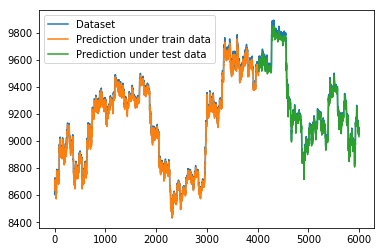

In [94]:
import matplotlib.pyplot as plt

# 訓練データ部分の予測データ
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back:len(train_predict_inv)+look_back, :] = train_predict_inv

# テストデータ部分の予測データ
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict_inv)+(look_back*2)+1:len(dataset)-1, :] = test_predict_inv

plt.plot(scaler.inverse_transform(dataset), label='Dataset')
plt.plot(train_predict_plot, label='Prediction under train data')
plt.plot(test_predict_plot, label='Prediction under test data')
plt.legend()
plt.show()